In [58]:
import numpy as np
import keras 
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn import datasets
import matplotlib.pyplot as plt

In [59]:
#Data
data = datasets.load_iris()

#print(data)

In [60]:
x = data.data
y = data.target
z = data.target_names

In [61]:
#split dataset
from sklearn.model_selection import train_test_split
x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size=0.3)

#data shapes
print(x_train.shape)
print(x_validation.shape)

(105, 4)
(45, 4)


In [62]:
#Build model
model = Sequential()
model.add(Dense(100,input_shape=(4,), activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(3, activation='softmax'))

In [63]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 100)               500       
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_3 (Dense)             (None, 3)                 303       
                                                                 
Total params: 803
Trainable params: 803
Non-trainable params: 0
_________________________________________________________________


In [64]:
#compile model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [65]:
#fit the model
hist = model.fit(x_train,y_train, epochs=50)

Epoch 1/50
4/4 [==============================] - 1s 5ms/step - loss: 1.3503 - accuracy: 0.3238
Epoch 2/50
4/4 [==============================] - 0s 8ms/step - loss: 1.0671 - accuracy: 0.4286
Epoch 3/50
4/4 [==============================] - 0s 12ms/step - loss: 1.1298 - accuracy: 0.4286
Epoch 4/50
4/4 [==============================] - 0s 6ms/step - loss: 1.1535 - accuracy: 0.4000
Epoch 5/50
4/4 [==============================] - 0s 12ms/step - loss: 0.9591 - accuracy: 0.6000
Epoch 6/50
4/4 [==============================] - 0s 4ms/step - loss: 0.9274 - accuracy: 0.5810
Epoch 7/50
4/4 [==============================] - 0s 3ms/step - loss: 0.9465 - accuracy: 0.4286
Epoch 8/50
4/4 [==============================] - 0s 4ms/step - loss: 1.0176 - accuracy: 0.4857
Epoch 9/50
4/4 [==============================] - 0s 5ms/step - loss: 0.9720 - accuracy: 0.5333
Epoch 10/50
4/4 [==============================] - 0s 5ms/step - loss: 0.8707 - accuracy: 0.5048
Epoch 11/50
4/4 [====================

Text(0.5, 0, 'epoch')

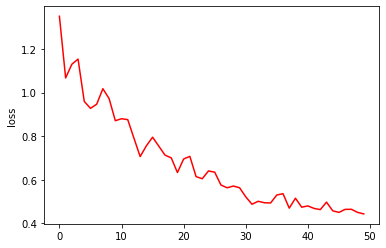

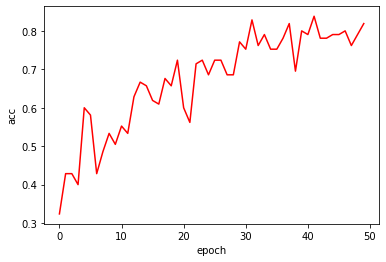

In [66]:
plt.figure()
#plt.plot(hist.history['validation_loss'], 'b')
plt.plot(hist.history['loss'], 'r')
plt.ylabel('loss')

plt.figure()
#plt.plot(hist.history['validation_accuracy'], 'b')
plt.plot(hist.history['accuracy'], 'r')
plt.ylabel('acc')
plt.xlabel('epoch')

In [67]:
#evaluate
model.evaluate(x_validation, y_validation)

2/2 [==============================] - 0s 3ms/step - loss: 0.3316 - accuracy: 0.9333


[0.33160391449928284, 0.9333333373069763]

In [92]:
#prediction for 1st 10 obs.
pred = model.predict(x_validation[:45])
print(pred)

[[9.44233060e-01 4.94058467e-02 6.36111572e-03]
 [1.26149179e-03 3.10846269e-01 6.87892258e-01]
 [2.77849790e-02 5.69106042e-01 4.03109014e-01]
 [1.00691000e-03 2.59598762e-01 7.39394307e-01]
 [1.06669811e-03 2.69962102e-01 7.28971183e-01]
 [1.30379871e-02 4.33101058e-01 5.53860962e-01]
 [8.85590553e-01 9.57114324e-02 1.86980534e-02]
 [9.40355539e-01 5.19812703e-02 7.66322622e-03]
 [9.45014596e-01 4.78503667e-02 7.13507924e-03]
 [9.06430185e-01 7.94339851e-02 1.41358757e-02]
 [6.67957217e-03 4.28294539e-01 5.65025866e-01]
 [9.56055284e-01 3.91320176e-02 4.81258612e-03]
 [9.59457517e-01 3.55332531e-02 5.00927726e-03]
 [5.06751202e-02 5.41785359e-01 4.07539517e-01]
 [5.51468618e-02 5.78877687e-01 3.65975440e-01]
 [9.31529760e-01 5.94866648e-02 8.98362510e-03]
 [1.48765845e-02 4.91713375e-01 4.93410021e-01]
 [2.93831620e-03 3.51631522e-01 6.45430148e-01]
 [1.48584030e-03 2.80373812e-01 7.18140304e-01]
 [9.60763097e-01 3.48523520e-02 4.38455027e-03]
 [4.33072522e-02 5.63924015e-01 3.927687

In [93]:
p = np.argmax(pred, axis=1)

print(p)
print(y_validation[:45])

[0 2 1 2 2 2 0 0 0 0 2 0 0 1 1 0 2 2 2 0 1 1 0 2 2 0 2 2 0 2 1 0 0 2 2 2 0
 2 0 2 1 0 1 2 1]
[0 2 1 2 2 1 0 0 0 0 2 0 0 1 1 0 1 2 2 0 1 1 0 2 2 0 2 2 0 2 1 0 0 1 2 2 0
 2 0 2 1 0 1 2 1]


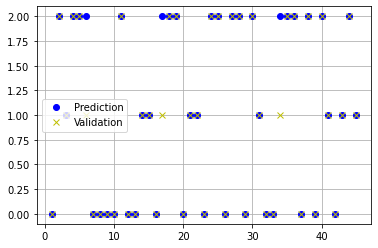

False

In [94]:
q = np.linspace(1,45, num=45)

plt.plot(q,p, 'o', color= 'b', label='Prediction')
plt.plot(q,y_validation[:45], 'x', color= 'y', label='Validation')
plt.grid()
plt.legend()
plt.show()

np.allclose(p, y_validation[:45], rtol=1e-05, atol=1e-08, equal_nan=False)

In [95]:
#prediction result

for i in p:
	print("prediction-class: {}, Name: {}".format(i,z[i]))

for i in y_validation[:45]:
	print("validation-class: {}, Name: {}".format(i,z[i]))

prediction-class: 0, Name: setosa
prediction-class: 2, Name: virginica
prediction-class: 1, Name: versicolor
prediction-class: 2, Name: virginica
prediction-class: 2, Name: virginica
prediction-class: 2, Name: virginica
prediction-class: 0, Name: setosa
prediction-class: 0, Name: setosa
prediction-class: 0, Name: setosa
prediction-class: 0, Name: setosa
prediction-class: 2, Name: virginica
prediction-class: 0, Name: setosa
prediction-class: 0, Name: setosa
prediction-class: 1, Name: versicolor
prediction-class: 1, Name: versicolor
prediction-class: 0, Name: setosa
prediction-class: 2, Name: virginica
prediction-class: 2, Name: virginica
prediction-class: 2, Name: virginica
prediction-class: 0, Name: setosa
prediction-class: 1, Name: versicolor
prediction-class: 1, Name: versicolor
prediction-class: 0, Name: setosa
prediction-class: 2, Name: virginica
prediction-class: 2, Name: virginica
prediction-class: 0, Name: setosa
prediction-class: 2, Name: virginica
prediction-class: 2, Name: vi